## 1.0 Loading libraries

In [256]:
import json.decoder

import numpy as np
import pandas as pd
import sklearn as sk
import json as json
# import seaborn as sns
import matplotlib
import pickle as pk
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from IPython.display import display
import seaborn as sns

print('numpy version:', np.__version__)
print('pandas version:', pd.__version__)
print('scikit-learn version:', sk.__version__)
print('json version:', json.__version__)
print('matplotlib version:', matplotlib.__version__)

numpy version: 1.23.3
pandas version: 1.5.0
scikit-learn version: 1.1.2
json version: 2.0.9
matplotlib version: 3.6.0


Here i will show all datas quality in plots

## 1.0 Loading data

In [4]:
RAW_recipes = pd.read_csv(r"C:\Users\evald\Desktop\Ai minor\dataset\Recipes\archive\RAW_recipes.csv")
RAW_interactions = pd.read_csv(r"C:\Users\evald\Desktop\Ai minor\dataset\Recipes\archive\RAW_interactions.csv")
pkl_recipes = pd.read_pickle(r"C:\Users\evald\Desktop\Ai minor\dataset\Recipes\archive\ingr_map.pkl")

ingredient_final = pd.read_csv(r"set/output.csv")


In [5]:
# ingredient_df = pkl_recipes.copy(deep=True)
# ingredient_df = ingredient_df.rename({"id":"ingredient_id","replaced":"ingredient_name"}, axis="columns")
# ingredient_df = ingredient_df[["ingredient_id", "ingredient_name"]]
# ingredient_df = ingredient_df.drop_duplicates(ignore_index=True)
# ingredient_df.head(10)

In [6]:
ingredient_final

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,recipe_id,average_rating,votes,ingredient_ids,like
0,aromatic basmati rice rice cooker,424415,61,496803,2010-05-10,"['weeknight', 'time-to-make', 'course', 'main-...","[228.2, 2.0, 2.0, 8.0, 9.0, 1.0, 15.0]",6,"['rinse the rice in a fine strainer , then dra...",from the ultimate rice cooker cookbook. the a...,"['basmati rice', 'water', 'salt', 'cinnamon st...",5,424415,4.833333,6,"[389, 7655, 6270, 1527, 3406]",1
1,pumpkin pie a la easy,146223,55,229619,2005-11-25,"['60-minutes-or-less', 'time-to-make', 'course...","[249.4, 16.0, 92.0, 8.0, 11.0, 27.0, 11.0]",10,"['preheat oven to 350', 'combine flour , oats ...",this is a pampered chef recipe for their stone...,"['flour', 'oats', 'brown sugar', 'pecans', 'bu...",12,146223,5.000000,4,"[2683, 4969, 800, 5298, 840, 2499, 6632, 7022,...",1
2,cheesy tomato soup with potatoes,312329,25,621626,2008-07-07,"['30-minutes-or-less', 'time-to-make', 'course...","[351.3, 34.0, 15.0, 50.0, 25.0, 70.0, 8.0]",6,"['pour the broth & water into a large pot', 'a...",after modifying another recipe i came up with ...,"['chicken broth', 'water', 'salt', 'black pepp...",15,312329,4.000000,1,"[1257, 7655, 6270, 590, 5024, 1119, 4883, 6696...",2
3,mini tacos,74301,15,60989,2003-10-29,"['15-minutes-or-less', 'time-to-make', 'course...","[79.7, 5.0, 2.0, 11.0, 11.0, 7.0, 2.0]",8,"['cook hamburger until browned', 'drain the fa...",these can be a easy appetizer or a light dinne...,"['wonton wrappers', 'hamburger', 'taco seasoni...",8,74301,4.766129,124,"[7940, 3609, 7060, 6265, 1170, 6654, 5003, 3561]",2
4,rosemary s hanky panky s,76272,20,93444,2003-11-12,"['30-minutes-or-less', 'time-to-make', 'course...","[240.7, 29.0, 9.0, 28.0, 27.0, 42.0, 0.0]",5,"['fry ground beef and sausage until browned', ...",my girlfriend rosemary gave me this wonderfull...,"['ground beef', 'ground sausage', 'velveeta ch...",4,76272,5.000000,3,"[3484, 6324, 7594, 243]",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178260,sugar free snickerdoodles,323143,23,57042,2008-09-04,"['30-minutes-or-less', 'time-to-make', 'course...","[304.1, 30.0, 0.0, 11.0, 10.0, 60.0, 8.0]",6,"['preheat over to 400', 'mix together butter a...",i have not tried this recipe. i got this recip...,"['butter', 'splenda granular', 'eggs', 'flour'...",7,323143,2.000000,4,"[840, 208, 2499, 2683, 1925, 335, 1511]",1
178261,sausage pancake strata,149114,70,191220,2005-12-22,"['time-to-make', 'course', 'main-ingredient', ...","[235.9, 26.0, 3.0, 19.0, 35.0, 37.0, 0.0]",14,"['preheat oven to 350', 'coat a 11 x 7 baking ...",my sister gave me this recipe just yesterday. ...,"['eggs', 'milk', 'cheddar cheese', 'salt', 'fr...",7,149114,4.333333,3,"[2499, 4717, 1168, 6270, 6324, 7040]",2
178262,baked beef patties,34200,55,37779,2002-07-15,"['60-minutes-or-less', 'time-to-make', 'course...","[577.5, 51.0, 26.0, 38.0, 84.0, 83.0, 8.0]",15,"['in a large bowl , combine 1 / 2 t', 'dried t...",taste of home; family favorite.,"['dried thyme', 'water', 'garlic salt', 'dried...",14,34200,4.500000,2,"[2378, 7655, 3219, 2320, 5168, 5319, 4189, 268...",2
178263,good and garlicky sweet and sour pork,30618,40,31499,2002-06-10,"['60-minutes-or-less', 'time-to-make', 'main-i...","[240.1, 5.0, 96.0, 12.0, 41.0, 5.0, 10.0]",13,"['for the sauce , combine all the sauce ingred...",the flavors of this dish mix really well toget...,"['pork tenderloin', 'fresh garlic', 'pineapple...",12,30618,4.612903,31,"[5627, 2807, 5412, 3399, 7979, 1093, 1257, 780...",1


In [7]:
RAW_recipes

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8
...,...,...,...,...,...,...,...,...,...,...,...,...
231632,zydeco soup,486161,60,227978,2012-08-29,"['ham', '60-minutes-or-less', 'time-to-make', ...","[415.2, 26.0, 34.0, 26.0, 44.0, 21.0, 15.0]",7,"['heat oil in a 4-quart dutch oven', 'add cele...",this is a delicious soup that i originally fou...,"['celery', 'onion', 'green sweet pepper', 'gar...",22
231633,zydeco spice mix,493372,5,1500678,2013-01-09,"['15-minutes-or-less', 'time-to-make', 'course...","[14.8, 0.0, 2.0, 58.0, 1.0, 0.0, 1.0]",1,['mix all ingredients together thoroughly'],this spice mix will make your taste buds dance!,"['paprika', 'salt', 'garlic powder', 'onion po...",13
231634,zydeco ya ya deviled eggs,308080,40,37779,2008-06-07,"['60-minutes-or-less', 'time-to-make', 'course...","[59.2, 6.0, 2.0, 3.0, 6.0, 5.0, 0.0]",7,"['in a bowl , combine the mashed yolks and may...","deviled eggs, cajun-style","['hard-cooked eggs', 'mayonnaise', 'dijon must...",8
231635,cookies by design cookies on a stick,298512,29,506822,2008-04-15,"['30-minutes-or-less', 'time-to-make', 'course...","[188.0, 11.0, 57.0, 11.0, 7.0, 21.0, 9.0]",9,['place melted butter in a large mixing bowl a...,"i've heard of the 'cookies by design' company,...","['butter', 'eagle brand condensed milk', 'ligh...",10


In [8]:
RAW_interactions

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."
...,...,...,...,...,...
1132362,116593,72730,2003-12-09,0,Another approach is to start making sauce with...
1132363,583662,386618,2009-09-29,5,These were so delicious! My husband and I tru...
1132364,157126,78003,2008-06-23,5,WOW! Sometimes I don't take the time to rate ...
1132365,53932,78003,2009-01-11,4,Very good! I used regular port as well. The ...


In [9]:
pkl_recipes.head(25)

,raw_ingr,raw_words,processed,len_proc,replaced,count,id
0,"medium heads bibb or red leaf lettuce, washed,...",13,"medium heads bibb or red leaf lettuce, washed,...",73,lettuce,4507,4308
1,mixed baby lettuces and spring greens,6,mixed baby lettuces and spring green,36,lettuce,4507,4308
2,romaine lettuce leaf,3,romaine lettuce leaf,20,lettuce,4507,4308
3,iceberg lettuce leaf,3,iceberg lettuce leaf,20,lettuce,4507,4308
4,red romaine lettuce,3,red romaine lettuce,19,lettuce,4507,4308
5,head romaine lettuce,3,head romaine lettuce,20,lettuce,4507,4308
6,curly endive lettuce,3,curly endive lettuce,20,lettuce,4507,4308
7,romaine lettuce hearts,3,romaine lettuce heart,21,lettuce,4507,4308
8,baby leaf lettuce,3,baby leaf lettuce,17,lettuce,4507,4308
9,head of lettuce,3,head of lettuce,15,lettuce,4507,4308


# Unique ingredients df

In [167]:
recipeMappingCollumnName = ['processed','replaced','id']
recipeMapDataSetFormated = pkl_recipes[recipeMappingCollumnName]


In [187]:
recipeMapDataSetFormated.groupby('replaced')['id'].count()
recipeMapDataSetFormated

,processed,replaced,id
0,"medium heads bibb or red leaf lettuce, washed,...",lettuce,4308
1,mixed baby lettuces and spring green,lettuce,4308
2,romaine lettuce leaf,lettuce,4308
3,iceberg lettuce leaf,lettuce,4308
4,red romaine lettuce,lettuce,4308
...,...,...,...
11654,soybean,soybean,6702
11655,goose,goose,3318
11656,ajwain,ajwain,47
11657,brinjal,brinjal,750


In [10]:
# test = pkl_recipes
# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()
# # le.fit([1, 2, 2, 6])
# # le.transform([1, 1, 2, 6])
# # le.inverse_transform([0, 0, 1, 2])
# le = preprocessing.LabelEncoder()
# le.fit(test.replaced)
#
# # list(le.classes_)
#
# # le.transform(["canned carrot"])
#
# list(le.inverse_transform([973]))


replaced
dressing              163
sausage               154
chile                  99
cake mix               85
cheddar                84
                     ... 
frozen english pea      1
frozen edamame          1
frozen dough roll       1
frozen dinner roll      1
zwieback toast          1
Name: id, Length: 8023, dtype: int64

In [188]:
pkl_recipes

,raw_ingr,raw_words,processed,len_proc,replaced,count,id
0,"medium heads bibb or red leaf lettuce, washed,...",13,"medium heads bibb or red leaf lettuce, washed,...",73,lettuce,4507,4308
1,mixed baby lettuces and spring greens,6,mixed baby lettuces and spring green,36,lettuce,4507,4308
2,romaine lettuce leaf,3,romaine lettuce leaf,20,lettuce,4507,4308
3,iceberg lettuce leaf,3,iceberg lettuce leaf,20,lettuce,4507,4308
4,red romaine lettuce,3,red romaine lettuce,19,lettuce,4507,4308
...,...,...,...,...,...,...,...
11654,soybeans,1,soybean,7,soybean,31,6702
11655,goose,1,goose,5,goose,8,3318
11656,ajwain,1,ajwain,6,ajwain,13,47
11657,brinjals,1,brinjal,7,brinjal,2,750


In [194]:
recipeMapDataSetFormated

,processed,replaced,id
0,"medium heads bibb or red leaf lettuce, washed,...",lettuce,4308
1,mixed baby lettuces and spring green,lettuce,4308
2,romaine lettuce leaf,lettuce,4308
3,iceberg lettuce leaf,lettuce,4308
4,red romaine lettuce,lettuce,4308
...,...,...,...
11654,soybean,soybean,6702
11655,goose,goose,3318
11656,ajwain,ajwain,47
11657,brinjal,brinjal,750


In [251]:
recipeUniqSet = recipeMapDataSetFormated.groupby(by=['replaced'])['id'].count().sort_values(ascending=False)
recipeUniqSet

replaced
dressing              163
sausage               154
chile                  99
cake mix               85
cheddar                84
                     ... 
frozen english pea      1
frozen edamame          1
frozen dough roll       1
frozen dinner roll      1
zwieback toast          1
Name: id, Length: 8023, dtype: int64

# Plotting

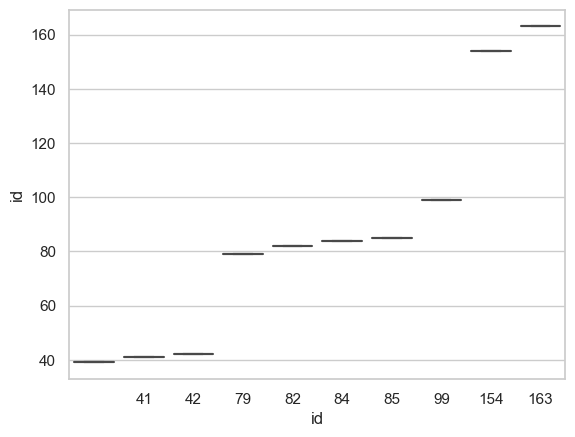

In [227]:
sns.set(style = "whitegrid")
ax = sns.boxplot(x = recipeUniqSet.head(10),y=recipeUniqSet)
ax.set_xticks(np.arange(1,10))
# ax.set_xlabel('Number of ingredients per recipe')
plt.show()

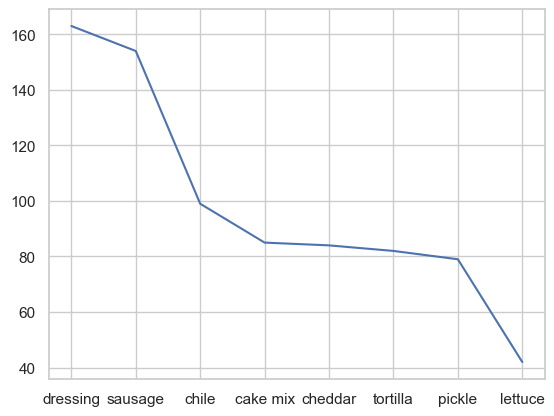

In [263]:
matplotlib.pyplot.plot(recipeUniqSet.head(8))


Matching ingredients to users preffered ingredients.

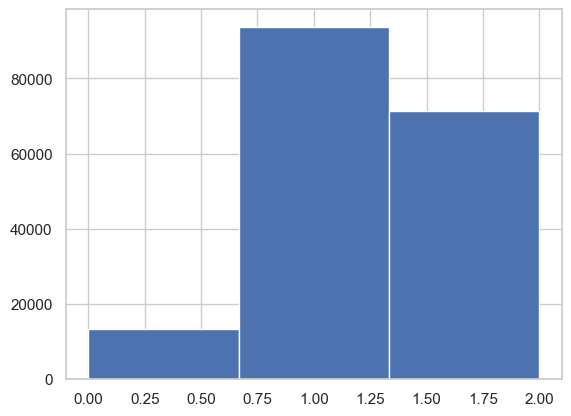

In [253]:
ingredient_final['like'].hist(bins=3)

plt.ylabel = "Count of likes"
plt.xlabel = "Values from disliked to liked"
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\evald\PycharmProjects\IndividualProject\venv\lib\site-packages\matplotlib\_tight_bbox.py:67: RuntimeWarning: divide by zero encountered in double_scalars
  fig.patch.set_bounds(x0 / w1, y0 / h1,
C:\Users\evald\PycharmProjects\IndividualProject\venv\lib\site-packages\matplotlib\_tight_bbox.py:68: RuntimeWarning: divide by zero encountered in double_scalars
  fig.bbox.width / w1, fig.bbox.height / h1)
C:\Users\evald\PycharmProjects\IndividualProject\venv\lib\site-packages\matplotlib\patches.py:736: RuntimeWarning: invalid value encountered in double_scalars
  x1 = self.convert_xunits(self._x0 + self._width)
C:\Users\evald\PycharmProjects\IndividualProject\venv\lib\site-packages\matplotlib\transforms.py:2046: RuntimeWarning: invalid value encountered in double_scalars
  self._mtx[0, 2] += tx


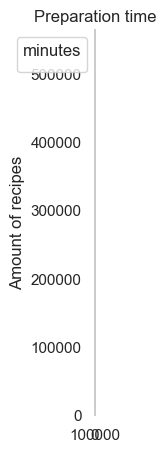

In [258]:
# ingredient_final['n_ingredients'].hist()
x1 = ingredient_final['minutes'].values
y1 = ingredient_final['id'].values

fig, ax = plt.subplots(figsize=(0,5))

ax.bar(x1,y1)

ax.set_ylabel('Amount of recipes')
ax.set_title('Preparation time')
ax.legend(title='minutes')
# plt.ylabel = "Count of likes"
# plt.xlabel = "Values from disliked to liked"
plt.show()

### Ingredient frequency

In [183]:
uniqueIngredients = pkl_recipes.groupby(by=['replaced'])['id'].value_counts().sort_values(ascending=False)
uniqueIngredientsDF = pd.DataFrame(uniqueIngredients)
uniqueIngredientsDF.rename(columns={'replaced':'ingredient_name','id':'frequency_count'},inplace=True)
uniqueIngredientsDF

,,frequency_count
replaced,id,
dressing,2200,163
sausage,6324,154
chile,1316,99
cake mix,912,85
cheddar,1168,84
...,...,...
frozen english pea,3011,1
frozen edamame,3010,1
frozen dough roll,3009,1


In [184]:
# recipeIngredientsDF = pd.DataFrame(pkl_recipes,columns=['processed','replaced','id'],index=['1','2','3'])
# recipeIngredientsDF

In [247]:
g = uniqueIngredientsDF.nlargest(columns="replaced", n = 50)
plt.figure(figsize=(12,15))
ax = sns.barplot(data=g, x= "replaced", y = "frequency_count")
ax.set(ylabel = 'Count')
plt.show()

KeyError: 'replaced'

In [ ]:
# pkl_recipes['replaced'].hist(bins=15)
#
# plt.ylabel = "Count of likes"
# plt.xlabel = "Values from disliked to liked"
# plt.show()

In [ ]:
CollumnNameRec = ['ingredientName','ingredientCount']

recipeUniqSet = RAW_recipes.groupby(by=['replaced'])['id'].count().sort_values(ascending=False)

recipeUniqSet = recipeUniqSet.rename([])

matplotlib.pyplot.plot(recipeUniqSet.head(5))
matplotlib.pyplot.scatter(recipeUniqSet['replaced'])

print(recipeUniqSet.head(25))

In [ ]:
ingredient_final['average_rating'].hist(bins=5)

plt.ylabel = "Count of likes"
plt.xlabel = "Values from disliked to liked"
plt.show()

In [ ]:
ingredient_final['votes'].max()

# Ingredients

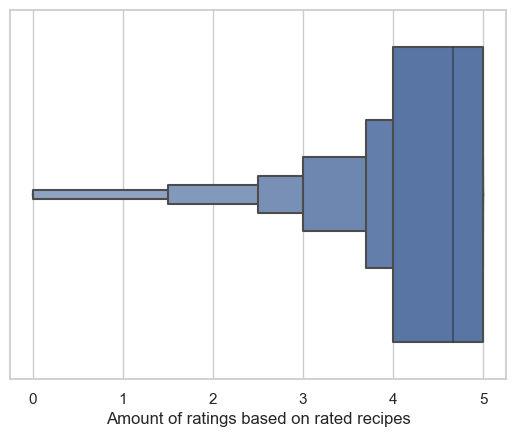

In [138]:
sns.set(style = "whitegrid")
ax = sns.boxenplot(x = ingredient_final['average_rating'])
ax.set_xticks(np.arange(0,6))
ax.set_xlabel('Amount of ratings based on rated recipes')
plt.show()

# Meal preparation

In [93]:
upper_limit = ingredient_final['minutes'].quantile(0.99)
lower_limit = ingredient_final['minutes'].quantile(0.01)

In [94]:
upper_limit

730.0

In [89]:
drops = ingredient_final.drop(1864,axis=0,inplace=True)

In [91]:
drops

In [259]:
years = mdates.YearLocator()
years_fmt = mdates.DateFormatter('%Y-%m')

<AxesSubplot: ylabel='submitted'>

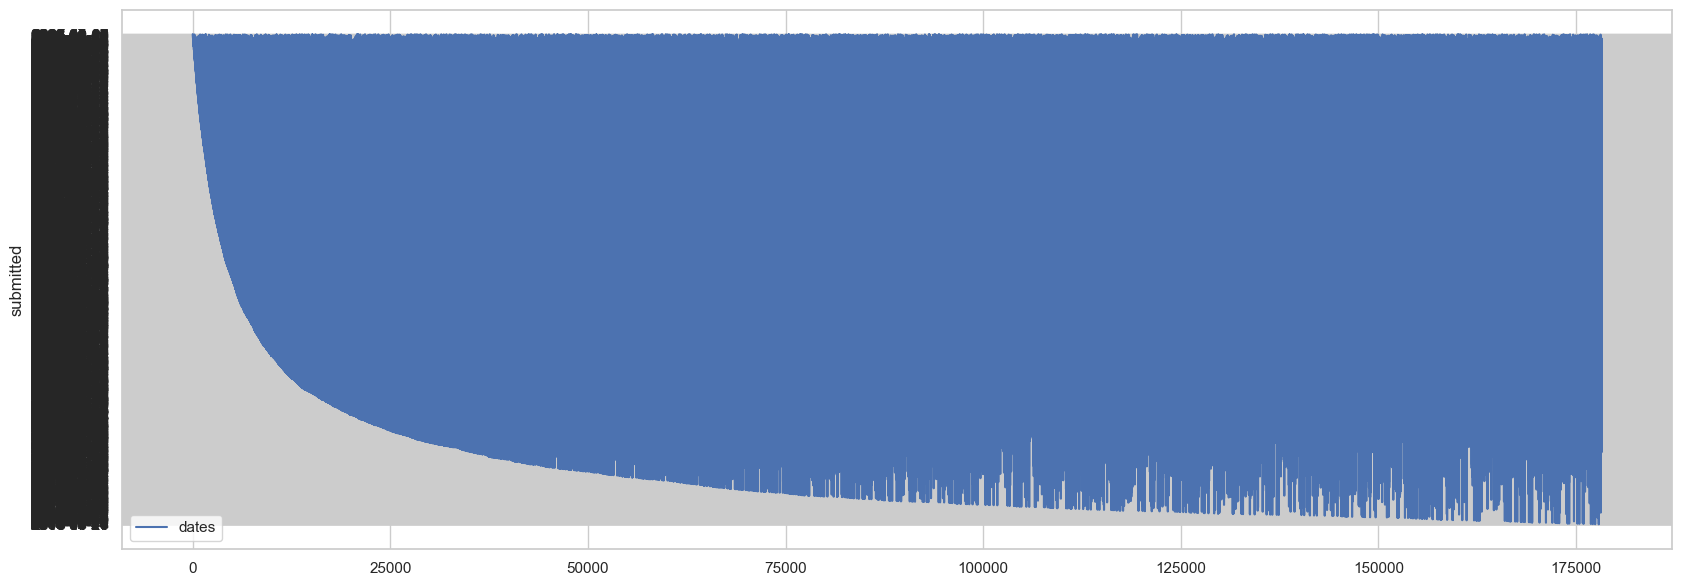

In [262]:
fig, axes = plt.subplots(figsize=(20,7))
sns.lineplot(data=ingredient_final['submitted'], label = 'dates')

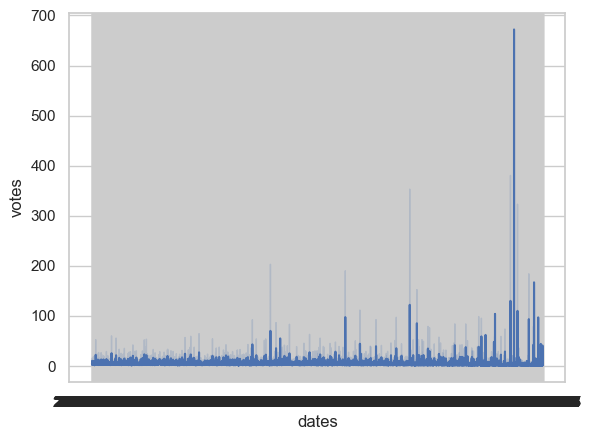

In [255]:
sns.set(style = "whitegrid")
ingredient_final['submitted'] = mdates.DateFormatter('%Y')
ax = sns.lineplot(x = ingredient_final['submitted'] ,y=ingredient_final['votes'])
# ax.set_xticks(np.arange(1,500))
# ax.set_yticks(np.arange(1,100))

ax.set_xlabel('dates')
ax.set_ylabel('votes')
plt.show()

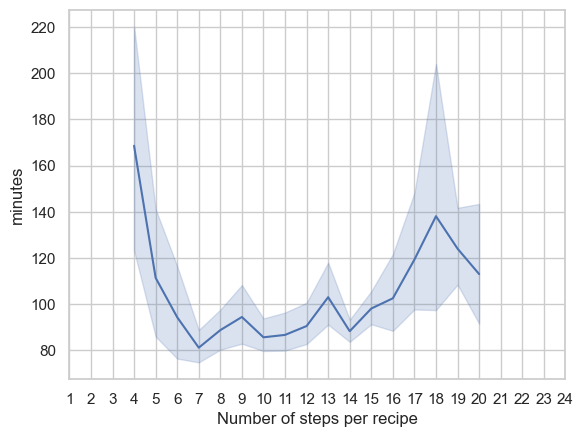

In [115]:
sns.set(style = "whitegrid")
ax = sns.lineplot(x = ingredient_final['n_ingredients'] ,y=ingredient_final['minutes'])
ax.set_xticks(np.arange(1,25))
ax.set_xlabel('Number of ingredients per recipe')
plt.show()

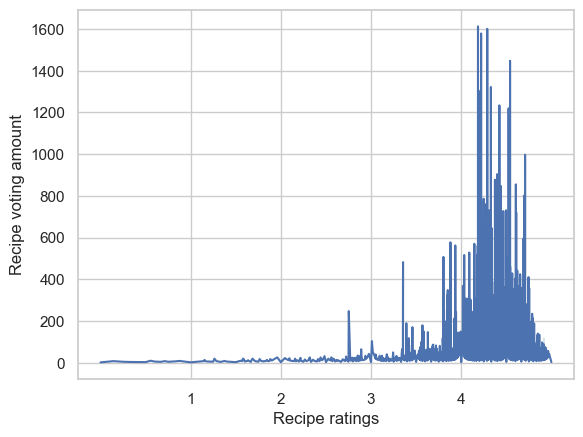

In [123]:
sns.set(style = "whitegrid")
ax = sns.lineplot(x = ingredient_final['average_rating'] ,y=ingredient_final['votes'])
ax.set_xticks(np.arange(1,5))
# ax.set_yticks(np.arange(1,100))
ax.set_xlabel('Recipe ratings')
ax.set_ylabel('Recipe voting amount')
plt.show()

Idk on this

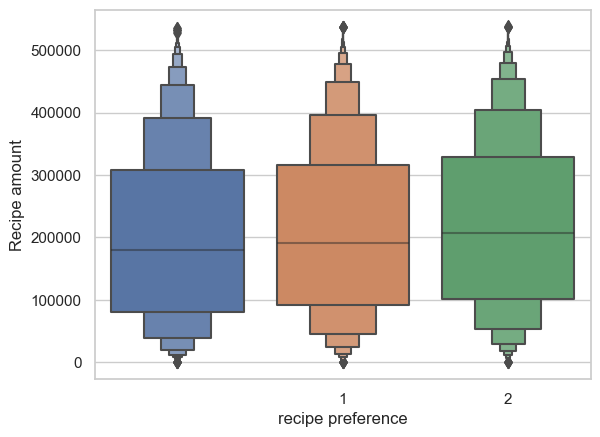

In [148]:
sns.set(style = "whitegrid")
ax = sns.boxenplot(x = ingredient_final['like'] ,y=ingredient_final['id'])
ax.set_xticks(np.arange(1,3,1))
# ax.set_yticks(np.arange(1,100))
ax.set_xlabel('recipe preference')
ax.set_ylabel('Recipe amount')
plt.show()

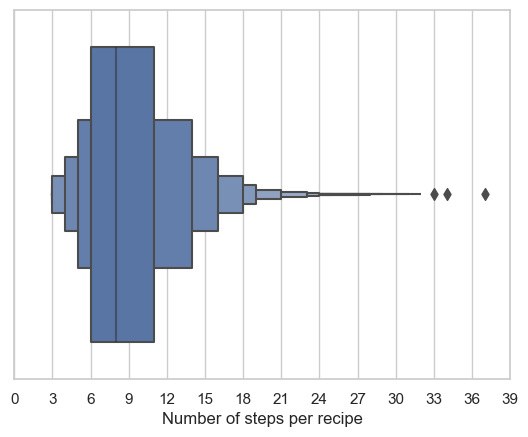

In [101]:
sns.set(style = "whitegrid")
ax = sns.boxenplot(x = ingredient_final['n_steps'])
ax.set_xticks(np.arange(0,40, 3))
ax.set_xlabel('Number of steps per recipe')
plt.show()

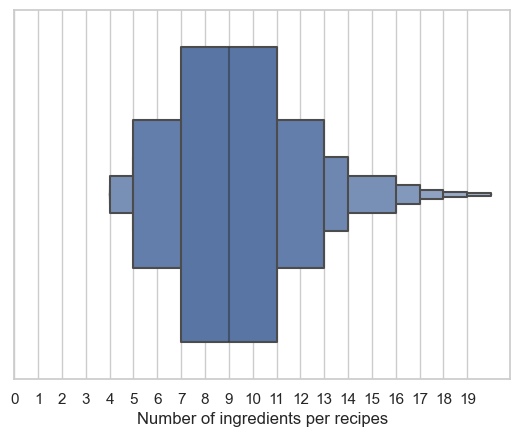

In [33]:
sns.set(style = "whitegrid")
ax = sns.boxenplot(x = ingredient_final['n_ingredients'])
ax.set_xticks(np.arange(0,20, 1))
ax.set_xlabel('Number of ingredients per recipes')
plt.show()

# Popularity

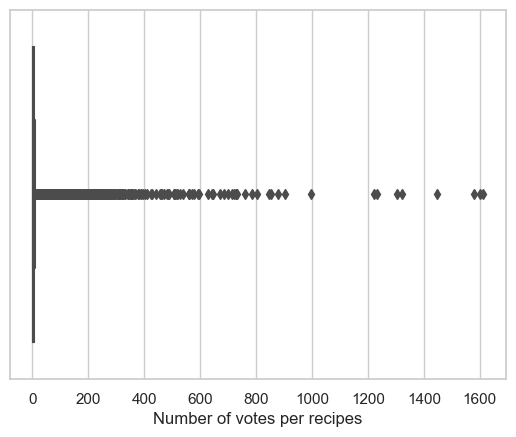

In [162]:
sns.set(style = "whitegrid")
ax = sns.boxplot(x = ingredient_final['votes'])
# ax.set_xticks(np.arange(0,10))
ax.set_xlabel('Number of votes per recipes')
plt.show()

In [27]:
# number of votes per recipe
average_votes = ingredient_final['votes'].where(ingredient_final['votes']<200)


sns.set(style = "whitegrid")
ax = sns.boxenplot(x = ingredient_final['average_rating'],y=average_votes)
ax.set_xticks(np.arange(1,200, 0))
ax.set_xlabel('Number of votes')
plt.figure(figsize=(160,2))
plt.show()

ZeroDivisionError: division by zero

Error in callback <function flush_figures at 0x0000021B1385D2D0> (for post_execute):


KeyboardInterrupt: 

In [ ]:
import warnings
average_votes = ingredient_final['votes'].where(ingredient_final['votes']<200)
warnings.filterwarnings('ignore')
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.distplot(average_votes)
plt.subplot(1,2,2)
sns.distplot(ingredient_final['average_rating'])
plt.show()

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(ingredient_final['votes'])

plt.show()

In [ ]:
# sns.boxplot(ingredient_final['votes'])

In [ ]:
# number of ingredients per recipe
sns.set(style = "whitegrid")
ax = sns.boxenplot(x = ingredient_final['n_ingredients'])
ax.set_xticks(np.arange(0,20))
ax.set_xlabel('Number of ingredients per recipe in test set')
plt.show()


In [ ]:
# Number of steps per recipe

sns.set(style = "whitegrid")
ax = sns.boxenplot(x = ingredient_final['n_steps'])
ax.set_xticks(np.arange(0,40, 2))
ax.set_xlabel('Number of steps per recipe')
plt.show()



In [ ]:
ingredient_final['minutes'].max().head(10)

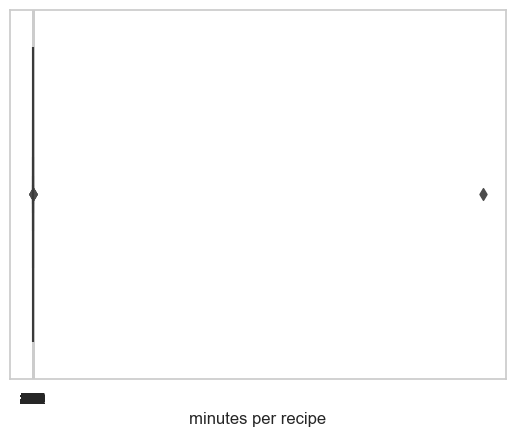

In [42]:
# amount of minutes per recipe

sns.set(style = "whitegrid")
ax = sns.boxenplot(x = ingredient_final['minutes'])
ax.set_xticks(np.arange(0,500))
ax.set_xlabel('minutes per recipe')
plt.show()



In [ ]:
UniqueSet = food_df.groupby(['contributor_id'])['id'].agg(['count'])
# UniqueSet.rename(index={0:"IdCount"})
# UniqueSet.head(20)

UniqueSet.reset_index(inplace=True)


#Rename columns
# UniqueSet.rename(columns={'mean':'average_rating','count':'votes'},inplace=True)
# UniqueSet.head(10)
UniqueSet.shape

In [246]:
# Scatter on user activity
N = 27926

x = ingredient_final['average_rating']
y = ingredient_final['contributor_id']
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

plt.subplot(x, y, alpha=0.5)
plt.show()

ValueError: Single argument to subplot must be a three-digit integer, not 0         496803
1         229619
2         621626
3          60989
4          93444
           ...  
178260     57042
178261    191220
178262     37779
178263     31499
178264     68526
Name: contributor_id, Length: 178264, dtype: int64

<Figure size 640x480 with 0 Axes>

In [ ]:
newfoodPd = ingredient_final['average_rating']
f, ax = plt.subplots(figsize=(20, 10))
corr = ingredient_final[['like','average_rating']].corr()
sns.heatmap(corr, annot=True,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)
plt.show()

In [ ]:
# sns.set_theme(style="ticks")
# df = sns.load_dataset("liked")
# sns.pairplot(df, hue="species")

In [ ]:
# # number of times the ingredient shows up in the recipes X being the ingredient y being the amount it shows up
# # import matplotlib.pyplot as plt
# from scipy import stats
#
# # Change stats to DF values
# x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
# y = [99,86,87,88,111,86,103,87,94,78,77,85,86]
#
# slope, intercept, r, p, std_err = stats.linregress(x, y)
#
# def myfunc(x):
#   return slope * x + intercept
#
# mymodel = list(map(myfunc, x))
#
# plt.scatter(x, y)
# plt.plot(x, mymodel)
# plt.show()

In [ ]:
ingredient_final

In [ ]:
ingredient_final[ingredient_final['n_steps'] > 22]['average_rating'].value_counts()

In [243]:
# Rare ingredients in the data set
SetUp = ingredient_final

col = list(SetUp.columns)
for column in ['rating', 'calories', 'total fat', 'sugar_nutrition', 'sodium', 'protein',
       'saturated fat', 'carbohydrates']:
    col.remove(column)
sum_ingredients = pd.DataFrame(SetUp[col].sum(axis = 0)/SetUp.shape[0])

sns.set(style = "whitegrid")
ax = sns.boxenplot(x = sum_ingredients.values*100)
ax.set_xticks(np.arange(0,10, 2))
ax.set_xlabel('Number of time an ingredient was used')
plt.show()

sum_freq_ingred_index = list(sum_ingredients[sum_ingredients[0]>0.01].index)



ValueError: list.remove(x): x not in list

In [ ]:
# unique ingredient count
recipeUniqSet = pkl_recipes.groupby(by=['replaced'])['id'].count().sort_values(ascending=False)
recipeUniqSet = pkl_recipes.replaced.value_counts()
recipeUniqSet = recipeUniqSet.rename(column={0:'name',1:'count'})

recipeUniqSet

In [ ]:
matplotlib.pyplot.scatter(recipeUniqSet)

In [ ]:
sns.set(style = "whitegrid")
ax = sns.barplot(x = recipeUniqSet)
ax.set_xticks(np.arange(0,163,2))
ax.set_xlabel('Number of steps per recipe')
plt.show()

In [ ]:
#Rating count
RAW_interactions.rating.value_counts()

# HeatMaps

C:\Users\evald\AppData\Local\Temp\ipykernel_3528\2049957149.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


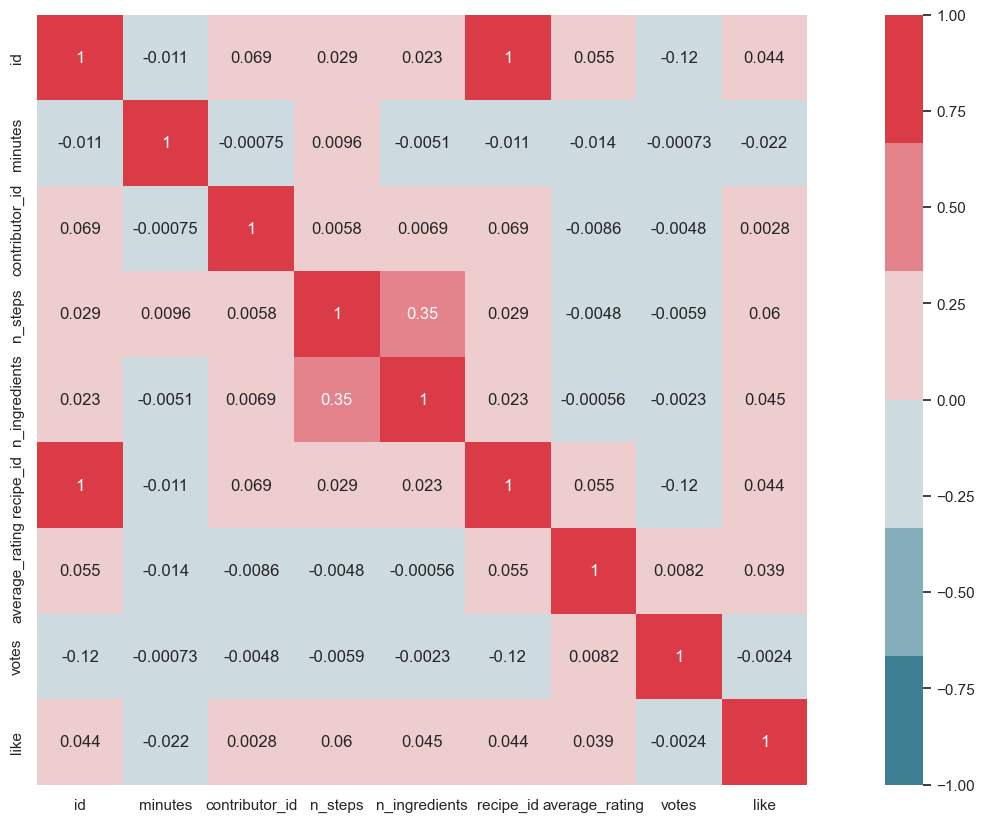

In [239]:
df = ingredient_final
f, ax = plt.subplots(figsize=(20, 10))
corr = df.corr()
sns.heatmap(corr, annot=True,
    cmap=sns.diverging_palette(220, 10, as_cmap=False),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)
plt.show()

C:\Users\evald\AppData\Local\Temp\ipykernel_3528\4243533490.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


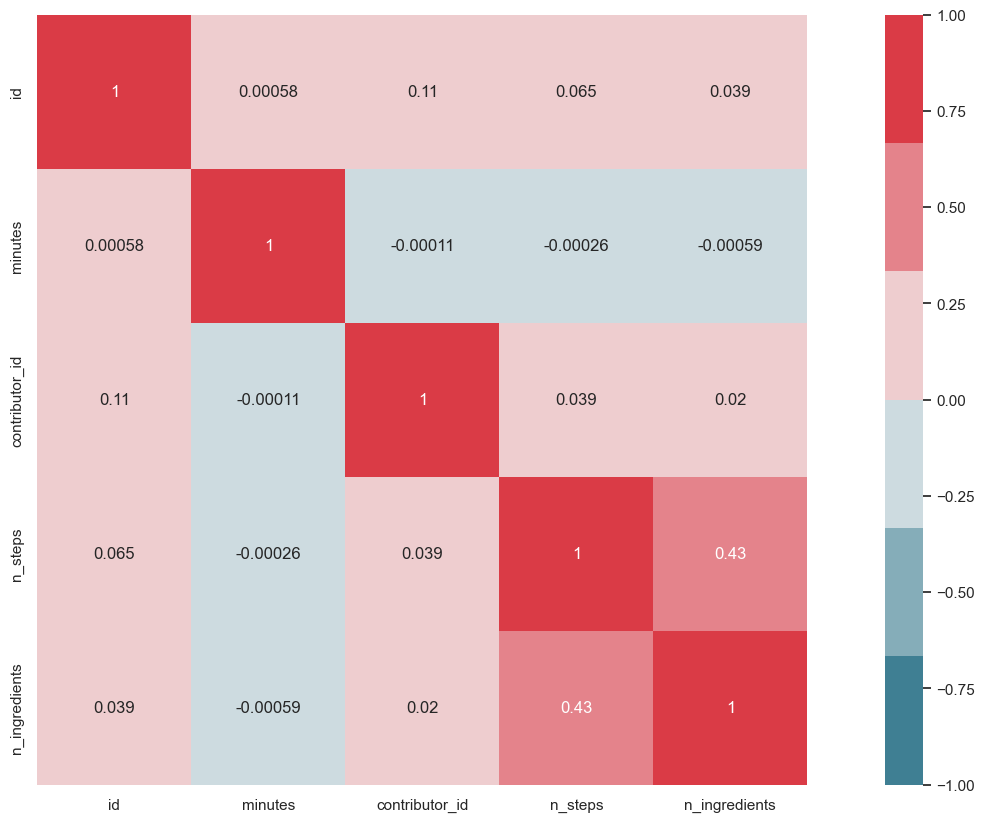

In [240]:
df = RAW_recipes
f, ax = plt.subplots(figsize=(20, 10))
corr = df.corr()
sns.heatmap(corr, annot=True,
    cmap=sns.diverging_palette(220, 10, as_cmap=False),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)
plt.show()

C:\Users\evald\AppData\Local\Temp\ipykernel_3528\1191876443.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


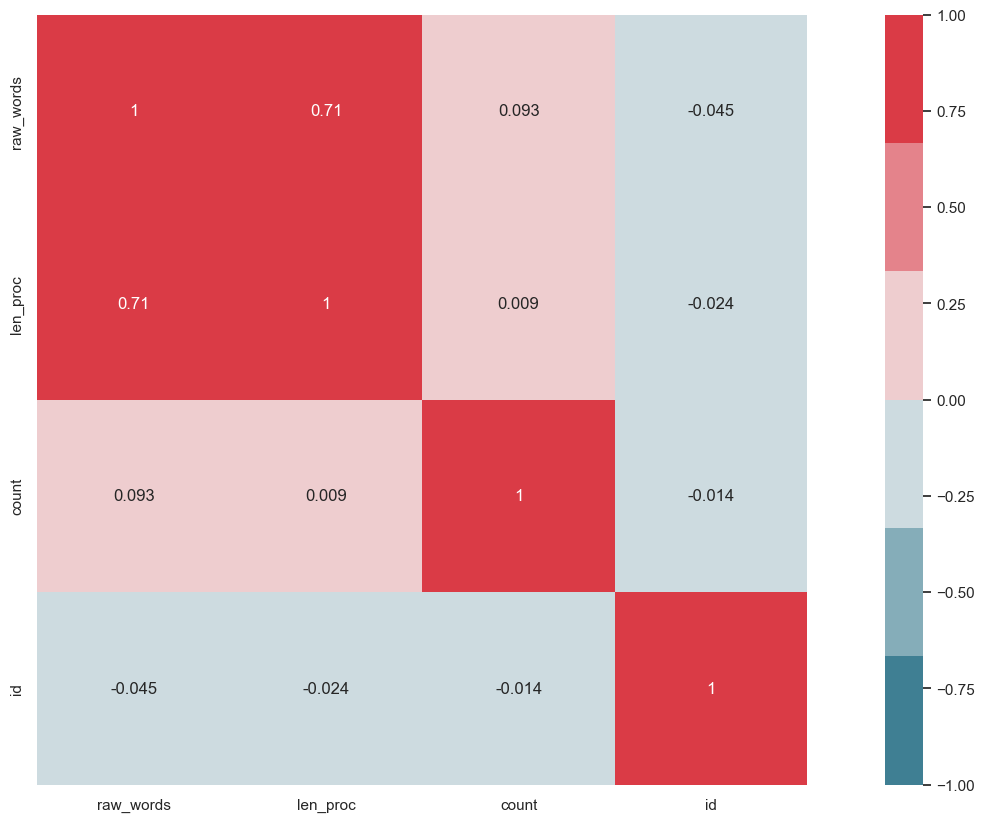

In [241]:
df = pkl_recipes
f, ax = plt.subplots(figsize=(20, 10))
corr = df.corr()
sns.heatmap(corr, annot=True,
    cmap=sns.diverging_palette(220, 10, as_cmap=False),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)
plt.show()

The length of X_ratings: 178264
The length of Y_votes: 178264


ValueError: s must be a scalar, or float array-like with the same size as x and y

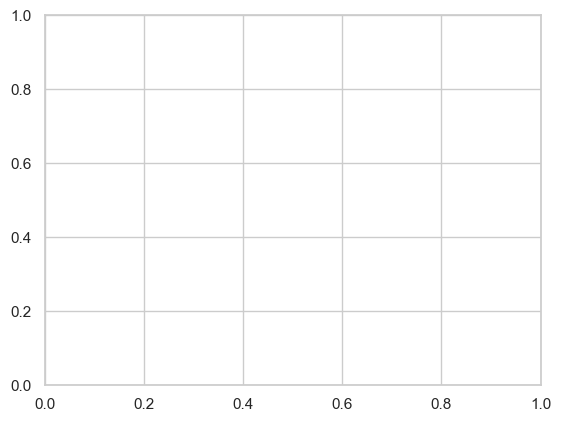

In [242]:
# Plot section
xVal = pd.DataFrame(ingredient_final['average_rating'])
yVal = pd.DataFrame(ingredient_final[['votes']])

# #Normalize
# scaler_votes = StandardScaler().fit(yVal)
# yVal = scaler_votes.transform(yVal)
# scaler_ids = StandardScaler().fit(xVal)
# xVal = scaler_ids.transform(xVal)
print('The length of X_ratings: {}'.format(len(xVal)))
print('The length of Y_votes: {}'.format(len(yVal)))

area = (30 * np.random.rand(231637))**2  # 0 to 15 point radii
colors = np.random.rand(231637)
plt.scatter(x=xVal,y=yVal,s=area, c=colors,alpha=0.5,norm='linear' )
plt.xlabel('average_rating')
plt.ylabel('votes')
plt.show()

In [ ]:
#ingredient_ratingCount.hist(column = 'totalRatingCount', bins =50, figsize=(20,5))
# fig, ax = plt.subplots(figsize=(17,8))
# plt.axvline(x=50,ymax=0.95, c='red', label = 'Threshold (50)')
#
# # sns.histplot(ax=ax, data = movie_ratingCount['totalRatingCount'], log_scale=True);
# plt.legend(fontsize=25);